<a href="https://colab.research.google.com/github/Daria-Lytvynenko/ML_course/blob/main/HW_2_1_%D0%9B%D1%96%D0%BD%D1%96%D0%B9%D0%BD%D0%B0_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%96%D1%8F_%D0%B2%D1%96%D0%B4_%D0%B1%D0%B0%D0%B3%D0%B0%D1%82%D1%8C%D0%BE%D1%85_%D0%B7%D0%BC%D1%96%D0%BD%D0%BD%D0%B8%D1%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В цьому домашньому завданні ми з вами побудуємо повноцінне ML-рішення реальної ML-задачі. Ви вже маєте всі знання, які для цього потрібні. Дотримуйтесь інструкцій, та користуйтесь матеріалами лекцій, аби виконувати завдання. Тут інструкції будуть детальні, а в подільших завданнях - будуть ставати все менш детальними, аби ви вже починали самостійно структурувати ML-проєкт і до кінця курсу для вас розвʼязати будь-яку ML–задачу було eazy-breezy.

## Dataset

Будемо працювати з набором даних `cars.csv`, який описує автомобілі і їх ціну у індійських рупіях :) Мета - передбачити ціну авто за його характеристиками. Опис набору даних:

| Назва рядка            | Опис                                                                                                                                                 |
|------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------|
| Car_ID                 | Унікальний ідентифікатор для кожного оголошення про автомобіль.                                                                                         |
| Brand                  | Бренд або виробник автомобіля (наприклад, Toyota, Honda, Ford тощо).                                                                                     |
| Model                  | Модель автомобіля (наприклад, Camry, Civic, Mustang тощо).                                                                                               |
| Year                   | Рік виготовлення автомобіля.                                                                                                                            |
| Kilometers_Driven      | Загальний пробіг автомобіля у кілометрах.                                                                                                               |
| Fuel_Type              | Тип палива, який використовує автомобіль (наприклад, бензин, дизель, електро тощо).                                                                      |
| Transmission           | Тип трансмісії автомобіля (наприклад, механічна, автоматична).                                                                                           |
| Owner_Type             | Кількість попередніх власників автомобіля (наприклад, перший, другий, третій).                                                                           |
| Mileage                | Паливна ефективність автомобіля у кілометрах на літр.                                                                                                   |
| Engine                 | Об'єм двигуна автомобіля в кубічних сантиметрах (CC).                                                                                                   |
| Power                  | Максимальна потужність автомобіля в кінських силах (bhp).                                                                                               |
| Seats                  | Кількість місць в автомобілі.                                                                                                                           |
| Price                  | Вартість автомобіля в INR (індійські рупії), що є цільовою змінною для прогнозування.                                                                   |

# Імпорти

Для зручності рекомендую всі імпорти розмістити тут нагорі, аби коли ви перезавантажували ноутбук, одразу можна було в один запуск клітинки імпортувати всі потрібні бібліотеки.

In [1]:
from google.colab import drive
import pandas as pd
import numpy as np
from sklearn.metrics import root_mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import seaborn as sns
import statsmodels.api as sm

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


# Знайомство з даними

**Завдання 1.** Завантажте набір даних `cars.csv` в pandas.DataFrame. Виведіть перші 5 записів.

In [3]:
cars=pd.read_csv('drive/MyDrive/ML_course/cars.csv')

In [4]:
cars.head()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000


**Завдання 2.** Виведіть типи даних колонок даних, а також дослідіть, які по факту типи даних мають записи в кожній колонці (тип `object` може містити різні типи даних) і скільки значень є в кожній категоріальній колонці.

Напишіть висновок, скільки в наборі даних числових та категоріальних колонок кожного з трьох різних типів (бінарна, мільтикатегоріальна без порядку, мультикатегоріальна з порядком). Шаблон висновку

```
В наборі даних 10 числових і 10 категоріальних колонок з них
- 2 бінарні (мають лише 2 значення)
- 6 мультикатегоріальних (більше 2х значень) зі значеннями, для яких немає відношення порядку
- 2 колонки, в яких можна встановити відношення порядку (наприклад Small<Medium<Large)
```

Якщо не знаєте, як це зробити з `pandas` - ось підказка, які методи можуть допомогти вам виконати це завдання

- pandas.DataFrame.info()
- pandas.DataFrame.dtypes
- pandas.DataFrame.loc[...]
- pandas.DataFrame.select_dtypes(...)
- pandas.Series.unique()
- pandas.Series.nunique()

Детальніше ознайомитись з кожним ви можете в [документації](https://pandas.pydata.org/docs/reference/frame.html), або написати в окремій клітинці знак питання і назву методу (тільки приберіть це перед здачею, бо перегляд документації - не допомагає зрозуміти дані і хід думок, а Ваша робота - це як презентація замовнику зробленої задачі).


In [5]:
# приклад як викликати документацію, якщо у Вас pandas імпортований як pd
?pd.DataFrame.info

In [6]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Car_ID             100 non-null    int64 
 1   Brand              100 non-null    object
 2   Model              100 non-null    object
 3   Year               100 non-null    int64 
 4   Kilometers_Driven  100 non-null    int64 
 5   Fuel_Type          100 non-null    object
 6   Transmission       100 non-null    object
 7   Owner_Type         100 non-null    object
 8   Mileage            100 non-null    int64 
 9   Engine             100 non-null    int64 
 10  Power              100 non-null    int64 
 11  Seats              100 non-null    int64 
 12  Price              100 non-null    int64 
dtypes: int64(8), object(5)
memory usage: 10.3+ KB


In [7]:
for i in cars.select_dtypes(include='object').columns:
  print (i, cars[i].nunique())

Brand 11
Model 58
Fuel_Type 2
Transmission 2
Owner_Type 3


In [8]:
for i in ['Fuel_Type', 'Transmission', 'Owner_Type']:
  print (cars[i].value_counts())

Fuel_Type
Petrol    52
Diesel    48
Name: count, dtype: int64
Transmission
Automatic    57
Manual       43
Name: count, dtype: int64
Owner_Type
First     44
Second    43
Third     13
Name: count, dtype: int64


В наборі даних 8 числових і 5 категоріальних колонок з них
- 2 бінарні (Fuel_type, Transmission)
- 2 мультикатегоріальних (Brand, Model) зі значеннями, для яких немає відношення порядку
- 1 колонки, в яких можна встановити відношення порядку (Owner_Type: First, Second, Third)

**Завдання 3**. Розділіть дані на тренувальні і тест. Відведіть в тест 20%, поставте `random_state=12`. Ми будемо передбачати колонку `Price` - тож, вона є цільовою змінною. В результаті у Вас має бути 4 набори даних `X_train, X_test, y_train, y_test`.

Надалі ми всюди тренуємо методи для кодування, масштабування та саму модель тільки на тренувальних даних X_train (та y_train для моделі), а на тестувальних лише використовуємо вже навчені методи для кодування, масштабування і модель викликаючи в них `transform()` (для методів обробки даних) або `predict()` (для моделі).

І так само треба робити завжди.

In [9]:
x=cars.iloc[:, :-1]

In [10]:
y=cars.Price

In [11]:
X_train, X_test, y_train, y_test=train_test_split(x,y, test_size=0.2, random_state=12)

**Завдання 4**. Кодуємо категоріальні колонки.

1. Закодуйте колонки з бінарними значеннями `Fuel_Type` і `Transmission` так, аби вони були у чисельному представленні і містили лише 0 так 1. Приклад був у лекції. Значення 1 нехай буде у категорії, яка містить більше значень в колонці.

2. Закодуйте колонку `Brand` з використанням `sklearn.preprocessing.OneHotEncoder` аналогічно до того, як ми робили це в лекції. Увага! Ми робимо виклик методу `Encoder.fit()` на тренувальних даних `X_train`, а на тестувальних тільки викликаємо `Encoder.transform()`. Додайте закодовані значення в набори даних `X_train`, `X_test`.

3. Колонку `Owner_Type` з використанням `sklearn.preprocessing.OrdinalEncoder` я закодую для вас. Проаналізуйте, що відбувається.

Колонка `Model` містять забагато значень для кодування в тому вигляді, як вона є зараз, з огляду на невелику кількість даних. Якщо ви бачите, як можна згрупувати значення в цій колонці скоротивши кількість унікальних значень до 3-5, то можете виконати ще цю трансформацію, використати цю колонку в моделі і отримати додаткову практику і бал, якщо все буде зроблено правильно. А якщо неправильно - то фідбек на Вашу роботу :)

In [12]:
fuel={'Petrol':1, 'Diesel':0}
X_train['Fuel_Type_code']=X_train.Fuel_Type.map(fuel)
X_test['Fuel_Type_code']=X_test.Fuel_Type.map(fuel)
transm={'Automatic':1, 'Manual':0}
X_train['Transmission_code']=X_train.Transmission.map(transm)
X_test['Transmission_code']=X_test.Transmission.map(transm)

In [13]:
enc=OneHotEncoder()
enc.fit(X_train[['Brand']])

OneHotEncoder()

In [14]:
enc.categories_

[array(['Audi', 'BMW', 'Ford', 'Honda', 'Hyundai', 'Mahindra', 'Maruti',
        'Mercedes', 'Tata', 'Toyota', 'Volkswagen'], dtype=object)]

In [15]:
brand_code=enc.transform(X_train[['Brand']]).toarray()

In [16]:
X_train[enc.categories_[0]]=brand_code

In [17]:
brand_code_test=enc.transform(X_test[['Brand']]).toarray()
X_test[enc.categories_[0]]=brand_code_test

In [18]:
from sklearn.preprocessing import OrdinalEncoder

ordenc = OrdinalEncoder(categories=[['First', 'Second', 'Third']]) # визначаємо порядок категорій
ordenc.fit(X_train[['Owner_Type']])

X_train['Owner_Type_Codes'] = ordenc.transform(X_train[['Owner_Type']])
X_test['Owner_Type_Codes'] = ordenc.transform(X_test[['Owner_Type']])

Очікуваний результат після трансформацій:

In [19]:
pd.set_option('display.max_columns', 100)
display(X_train.head()), display(X_test.head())

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_code,Transmission_code,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
83,84,Volkswagen,T-Roc,2019,22000,Petrol,Automatic,Second,18,1498,148,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
55,56,Audi,A5,2018,28000,Diesel,Automatic,First,17,1968,187,5,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,27,Audi,A6,2018,28000,Petrol,Automatic,First,15,1984,241,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54,55,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
19,20,Mercedes,GLC,2017,26000,Petrol,Automatic,Second,12,1991,241,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_code,Transmission_code,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
17,18,Audi,Q3,2016,38000,Petrol,Automatic,Second,15,1395,148,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
41,42,Hyundai,Santro,2019,26000,Petrol,Manual,Third,20,1086,68,5,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
92,93,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
14,15,Maruti,Ertiga,2020,18000,Petrol,Manual,First,19,1462,103,7,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
68,69,Ford,Aspire,2019,26000,Petrol,Manual,Third,20,1194,94,5,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


(None, None)

**Завдання 5.** Оберіть лише числові колонки з `X_train` (можна для цього використати `pandas.select_dtypes(...)` або видалити всі НЕчислові дані, вони нам вже не потрібні), обʼєднайте ці дані з `y_train` (зручно з `pandas.concat([df1, df2], axis=1)`), побудуйте для цих даних матрицю кореляції і проаналізуйте її. Напишіть висновок, які колонки корелюють з цільовою змінною на більш ніж 0.5 за модулем (може бути як позитивна, так і негативна кореляція).

In [20]:
cars_train=pd.concat([X_train.select_dtypes(include='int64'), y_train], axis=1)

<Axes: >

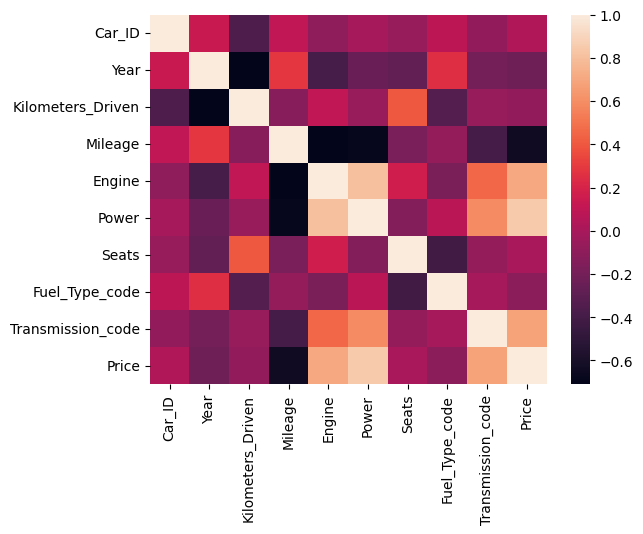

In [21]:
sns.heatmap(cars_train.corr())

Найбільше корелюють колонки негативно: Mileage,  позитивно: Engine, Power,Transmission code.

**Завдання 6**. Тренуємо лінійну регресію.
0. Видаліть усі НЕчислові колонки з `X_train`, `X_test`, якщо ще цього не зробили.
1. Натренуйте лінійну регресую з `sklearn` на усіх числових даних тренувального набору `X_train`.
2. Зробіть передбачення на  `X_train`, `X_test`. Знайдіть і виведіть root mean squared error відхилення передбачення від справжніх значень цільової змінної.
3. Побудуйте графік розсіювання передбачень проти реальних даних цільової змінної для тренувального і тестувального наборів даних. Що можете сказати про якість моделі?

In [22]:
X_train=X_train.select_dtypes(exclude='object')
X_test=X_test.select_dtypes(exclude='object')

In [23]:
X_train=sm.add_constant(X_train)
model=sm.OLS(y_train, X_train)
results=model.fit()
params=results.params

In [24]:
X_test = sm.add_constant(X_test)
predictions=results.predict(X_test)
pr_train=results.predict(X_train)

In [25]:
root_mean_squared_error(y_test, predictions)

258181.561120302

In [26]:
root_mean_squared_error(y_train, pr_train)

210293.5782815185

In [27]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     68.35
Date:                Mon, 20 Jan 2025   Prob (F-statistic):           2.01e-33
Time:                        18:11:10   Log-Likelihood:                -1094.0
No. Observations:                  80   AIC:                             2230.
Df Residuals:                      59   BIC:                             2280.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.594e+07   1.01e+08      0.158      0.875   -1.86e+08    2.18e+08
Car_ID              198.4165   1193.820      0.166      0.869   -2190.412    2587.245
Year              -7821.1909   5.43e+04     -0.144      0.886   -1.17e+05    1.01e+05
Kilometers_Driven   -10.2948      7.104     -1.449      0.153     -24.509       3.920
Mileage           -3.862e+04   1.71e+04     -2.259      0.028   -7.28e+04   -4408.773
Engine              -32.5523    110.982     -0.293      0.770    -254.627     189.523
Power              6101.0713    926.123      6.588      0.000    4247.904    7954.239
Seats             -2899.2570   5.69e+04     -0.051      0.960   -1.17e+05    1.11e+05
Fuel_Type_code    -3.678e+05   9.14e+04     -4.026      0.000   -5.51e+05   -1.85e+05
Transmission_code  2.395e+05   9.03e+04      2.653      0.010    5.89e+04     4.2e+05
Audi               2.206e+06   9.13e+06      0.242      0.810   -1.61e+07    2.05e+07
BMW                 2.18e+06   9.18e+06      0.238      0.813   -1.62e+07    2.05e+07
Ford               1.147e+06   9.14e+06      0.125      0.901   -1.71e+07    1.94e+07
Honda              1.261e+06   9.17e+06      0.137      0.891   -1.71e+07    1.96e+07
Hyundai            9.424e+05   9.17e+06      0.103      0.919   -1.74e+07    1.93e+07
Mahindra           8.739e+05    9.2e+06      0.095      0.925   -1.75e+07    1.93e+07
Maruti             1.057e+06   9.19e+06      0.115      0.909   -1.73e+07    1.94e+07
Mercedes           2.185e+06   9.13e+06      0.239      0.812   -1.61e+07    2.05e+07
Tata               1.321e+06    9.2e+06      0.144      0.886   -1.71e+07    1.97e+07
Toyota             1.573e+06    9.2e+06      0.171      0.865   -1.68e+07       2e+07
Volkswagen         1.192e+06   9.14e+06      0.130      0.897   -1.71e+07    1.95e+07
Owner_Type_Codes   6.476e+04   7.26e+04      0.892      0.376   -8.06e+04     2.1e+05
==============================================================================
Omnibus:                        0.187   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.911   Jarque-Bera (JB):                0.311
Skew:                           0.104   Prob(JB):                        0.856
Kurtosis:                       2.776   Cond. No.                     4.83e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.07e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

**Завдання 7**. Ми хочемо проаналізувати як впливає кожен чинник на цілову змінну. Для цього давайте промасштабуємо наші дані.
1. Зробіть масштабування незалежних змінних використовуючи `StandardScaler`. Тренуємо на тренувальних даних, а на тестувальних лише викликаємо `transform`.

2. Натренуйте модель на відмасштабованих даних і перегляньте коефіцієнти моделі. Які колонки є найвпливовішими на формування передбачення з точки зору коефіцієнтів? Проаналізуйте напрям дії найважливіших коефіцієнтів. Чи це логічно з точки зору значення відповідних змінних, що вони впливають на цільову змінну саме в напрямі збільшення / зменшення?

In [28]:
scale=StandardScaler()
scale.fit(X_train)
X_train_scaled=scale.transform(X_train)
X_test_scaled=scale.transform(X_test)

**Завдання 8.** На тих самих відмасштабованих даних натренуйте модель з `statsmodels`. Виведіть звіт і проаналізуйте p-value коефіцієнтів. Які ознаки є стат значущими на рівні значущості 0.05? Напишіть їх список.

In [29]:
X_train_scale=sm.add_constant(X_train_scaled)
model=sm.OLS(y_train, X_train_scaled)
results=model.fit()
params=results.params

In [30]:
X_test_scale = sm.add_constant(X_test_scaled)
predictions_scaled=results.predict(X_test_scale)
train_pred_scaled=results.predict(X_train_scale)

ValueError: shapes (20,23) and (22,) not aligned: 23 (dim 1) != 22 (dim 0)

In [ ]:
root_mean_squared_error(y_test, predictions_scaled)

In [ ]:
root_mean_squared_error(y_train, train_pred_scaled)

In [ ]:
results.summary()

In [ ]:
p_values=pd.DataFrame(results.pvalues.iloc[1:], columns=['pvalue']).reset_index(drop=True).set_index(X_train.columns)

**Завдання 9**. Натренуйте лінійну регресію з `statsmodels` тільки на ознаках, які виявлись стат. значущими в попередньому завданні. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared?

In [ ]:
features=p_values[p_values['pvalue']<0.05].index

In [ ]:
features

In [ ]:
X_train_upd=pd.DataFrame(X_train_scaled[:, 1:], columns=X_train.columns)[features]
X_test_upd=pd.DataFrame(X_test_scaled[:, 1:], columns=X_train.columns)[features]

In [ ]:
X_train_upd

In [ ]:
X_train_upd=sm.add_constant(X_train_upd)
X_test_upd=sm.add_constant(X_test_upd)
model=sm.OLS(y_train.reset_index(drop=True), X_train_upd.reset_index(drop=True))
results=model.fit()
results.params

In [ ]:
predictions_upd=results.predict(X_test_upd)
train_pred_upd=results.predict(X_train_upd)

In [ ]:
root_mean_squared_error(y_test, predictions_upd)

In [ ]:
root_mean_squared_error(y_train, train_pred_upd)

In [ ]:
results.summary()

**Завдання 10**. Натренуйте лінійну регресію з `statsmodels` на усіх ознаках з масштабованого `X_train`, у яких p_value в завданні 7 менше за `0.25`. Ми таким чином помʼякшили критерій відбору ознак. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared порівняно з завданням 7? Яку модель з останніх 3х завдань ви б лишили для використання?

In [ ]:
feat_upd=p_values[p_values['pvalue']<0.25].index

In [ ]:
X_train_final=pd.DataFrame(X_train_scaled[:, 1:], columns=X_train.columns)[feat_upd]
X_test_final=pd.DataFrame(X_test_scaled[:, 1:], columns=X_test.columns)[feat_upd]

In [ ]:
X_train_final=sm.add_constant(X_train_final)
X_test_final=sm.add_constant(X_test_final)
model=sm.OLS(y_train.reset_index(drop=True), X_train_final.reset_index(drop=True))
results=model.fit()
results.params

In [ ]:
predictions_final=results.predict(X_test_final)
train_pred_final=results.predict(X_train_final)

In [ ]:
root_mean_squared_error(y_test, predictions_final)

In [ ]:
root_mean_squared_error(y_test, train_pred_final)

In [ ]:
results.summary()